In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from datetime import timedelta, date

In [2]:
data= pd.read_excel('monthly_data_total.xlsx')

In [3]:
df= data.copy()
df.set_index("Date", drop=False, inplace=True)
df

,Date,Import,Export
Date,,,
2006-01-01,2006-01-01,12519.71,9143.66
2006-02-01,2006-02-01,11479.69,8993.29
2006-03-01,2006-03-01,14314.02,11560.97
2006-04-01,2006-04-01,12924.18,8624.66
2006-05-01,2006-05-01,15105.67,10109.30
...,...,...,...
2019-05-01,2019-05-01,46618.80,29854.24
2019-06-01,2019-06-01,40941.24,24990.77
2019-07-01,2019-07-01,39773.89,26217.50


# Creating Seperate datas for 'Import' & 'Export'

In [4]:
dfi= df.drop(['Export'], axis = 1)
dfi

,Date,Import
Date,,
2006-01-01,2006-01-01,12519.71
2006-02-01,2006-02-01,11479.69
2006-03-01,2006-03-01,14314.02
2006-04-01,2006-04-01,12924.18
2006-05-01,2006-05-01,15105.67
...,...,...
2019-05-01,2019-05-01,46618.80
2019-06-01,2019-06-01,40941.24
2019-07-01,2019-07-01,39773.89


In [5]:
dfe= df.drop(['Import'], axis=1)
dfe

,Date,Export
Date,,
2006-01-01,2006-01-01,9143.66
2006-02-01,2006-02-01,8993.29
2006-03-01,2006-03-01,11560.97
2006-04-01,2006-04-01,8624.66
2006-05-01,2006-05-01,10109.30
...,...,...
2019-05-01,2019-05-01,29854.24
2019-06-01,2019-06-01,24990.77
2019-07-01,2019-07-01,26217.50


# Analizing 'Import' 

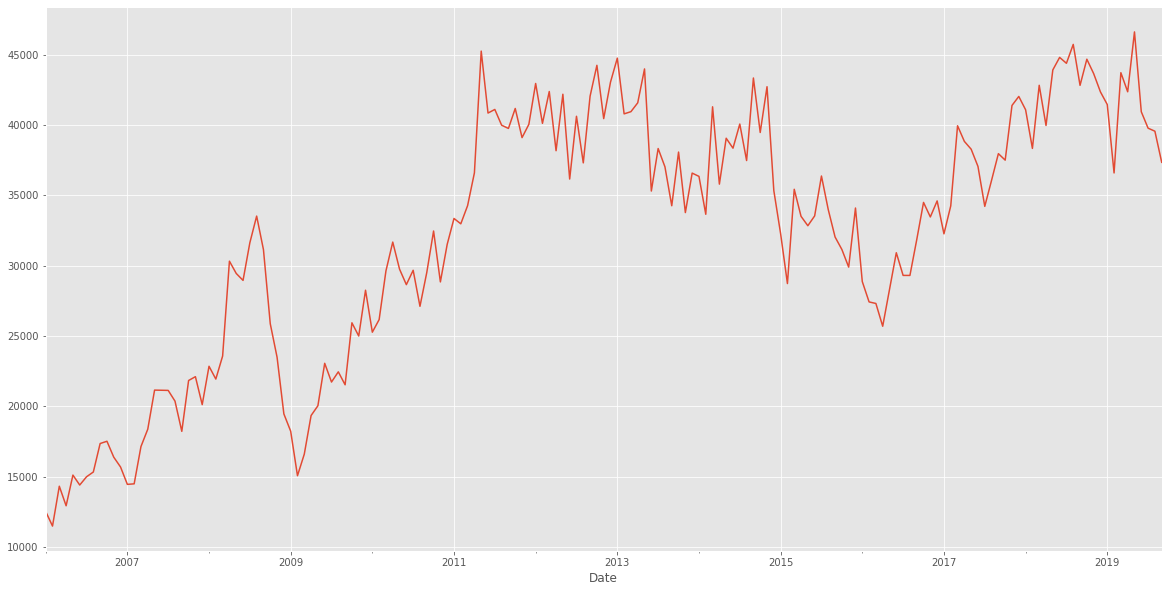

In [6]:
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
dfi.Import.plot()

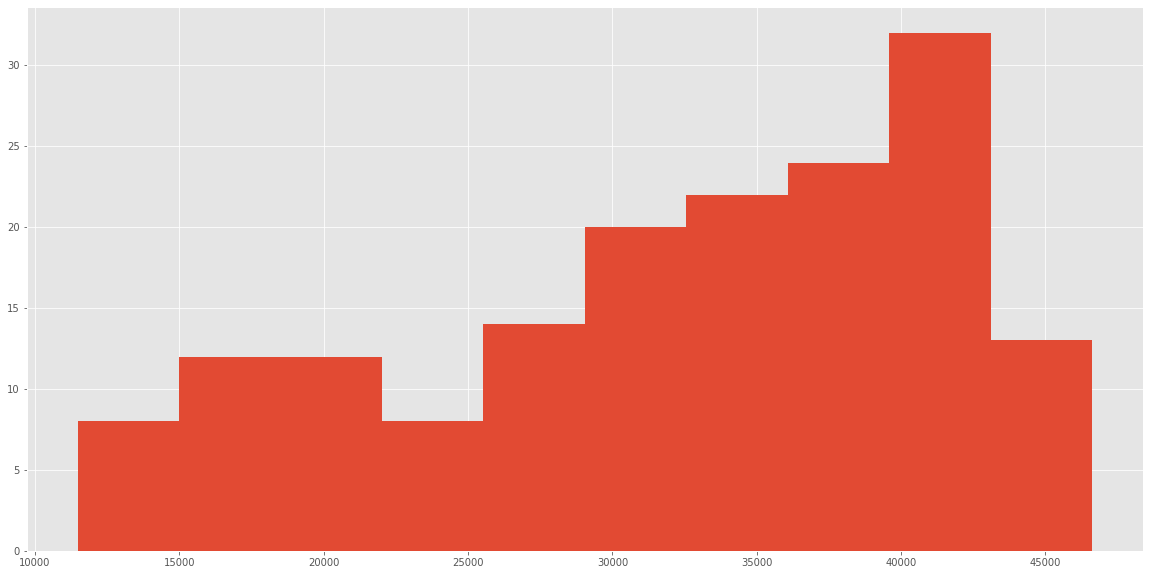

In [7]:
dfi['Import'].hist()

# Analizing 'Export'

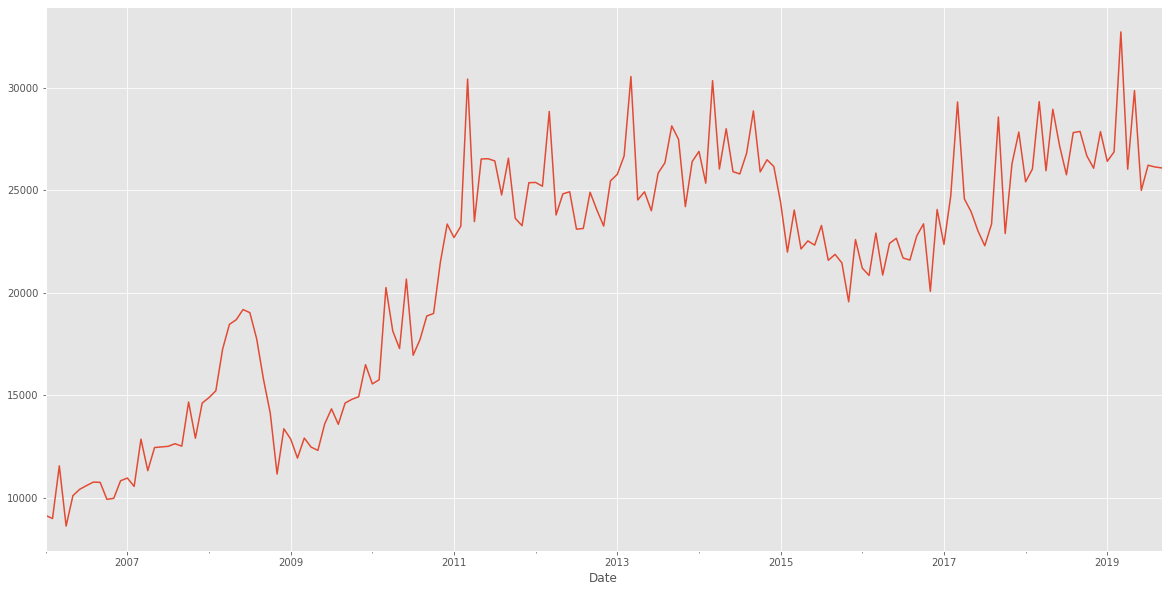

In [8]:
dfe.Export.plot()

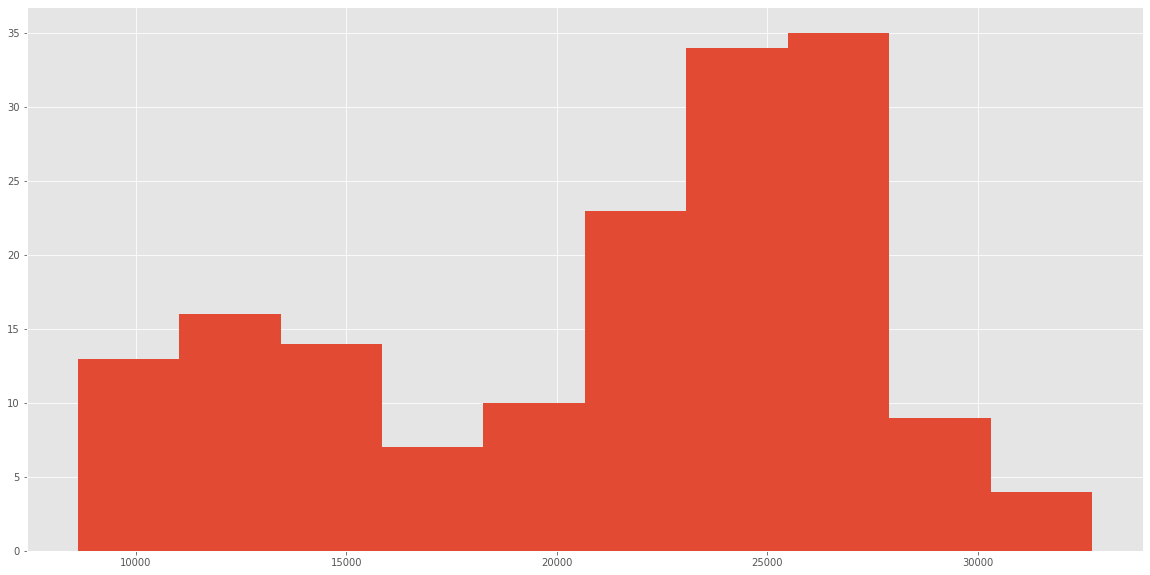

In [9]:
dfe['Export'].hist()

# Observing Mean & Variance to estimate Stationarity 

### Import 

In [10]:
one, two, three = np.split(
        dfi['Import'].sample(
        frac=1), [int(.25*len(dfi['Import'])),
        int(.75*len(dfi['Import']))])

In [11]:
mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print (mean1, mean2, mean3)
print (var1, var2, var3)

32443.394634146327 31980.459878048798 32284.363095238095
80805283.4109405 84550549.50258149 88969915.04496336


The variences are not constant for 'Import'

### Export 

In [12]:
one, two, three = np.split(
        dfe['Export'].sample(
        frac=1), [int(.25*len(dfe['Export'])),
        int(.75*len(dfe['Export']))])

In [13]:
mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print (mean1, mean2, mean3)
print (var1, var2, var3)

21781.18804878049 20755.118536585367 21443.811190476194
34425156.2710261 37848455.63124967 33707182.240210734


The variences are not constant for 'Export'

## Hence, from above we can estimate that the time series is not stationary
## Still we can get a more well defined approch to know stationarity, using Dickey-Fuller Test

In [14]:
from statsmodels.tsa.stattools import adfuller

def dic_full(ts):

    adf_test = adfuller(ts)

    print(adf_test)

    print ("ADF = " + str(adf_test[0]))
    print ("p-value = " +str(adf_test[1]))

### For 'Import' 

In [55]:
ts_i= dfi['Import']

In [56]:
dic_full(ts_i)

(-2.2990309234006747, 0.1722807084972593, 1, 163, {'1%': -3.471118535474365, '5%': -2.8794405060097024, '10%': -2.576313761526591}, 2813.539692698836)
ADF = -2.2990309234006747
p-value = 0.1722807084972593


The p-value is greater than 0.05. Also, the ADF is greater than all critical values, hence time series is not stationary

/home/rushank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


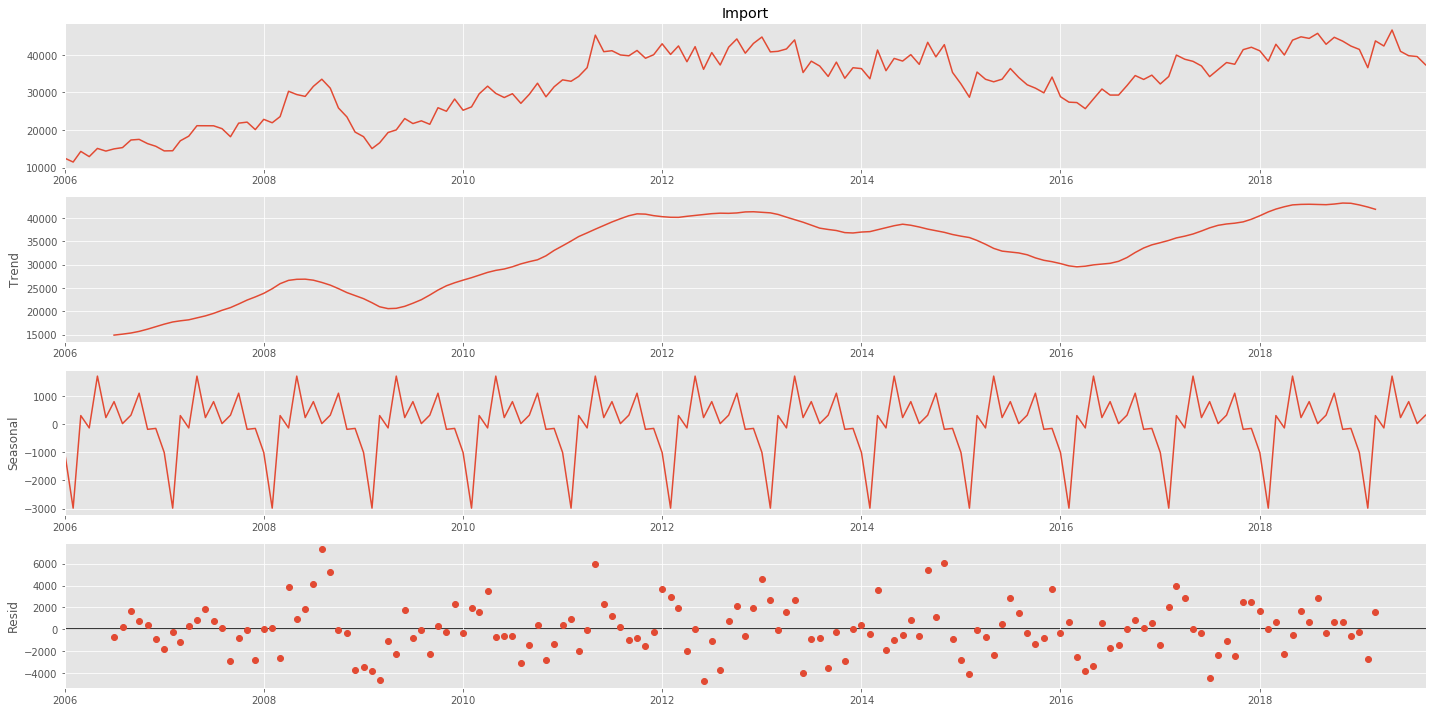

In [57]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_i, freq=12)
decomposition.plot()
plt.show()

### For 'Export' 

In [62]:
ts_e= dfe['Export']

In [63]:
dic_full(ts_e)

(-1.9961003848278354, 0.2882855578507896, 12, 152, {'1%': -3.474120870218417, '5%': -2.880749791423677, '10%': -2.5770126333102494}, 2662.4086542571063)
ADF = -1.9961003848278354
p-value = 0.2882855578507896


The p-value is greater than 0.05. Also, the ADF is greater than all critical values, hence time series is not stationary

/home/rushank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


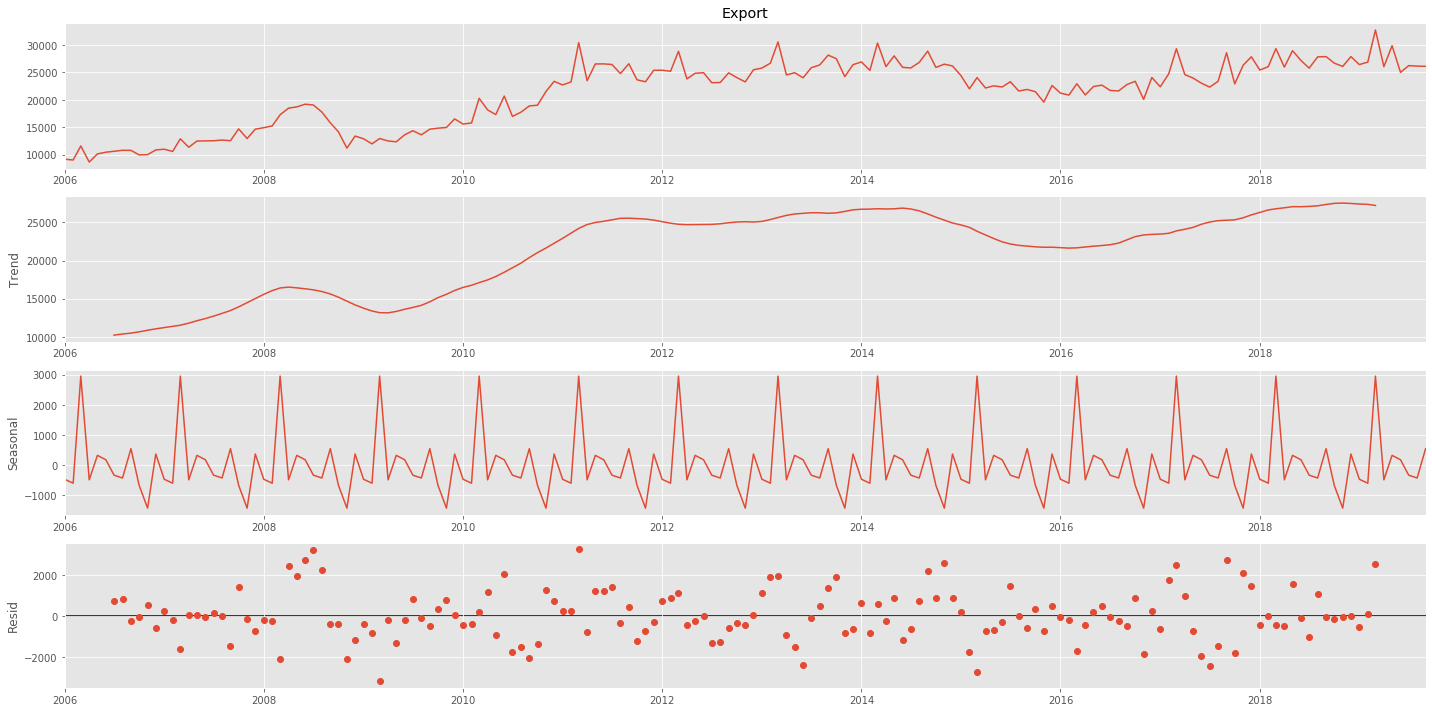

In [64]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_e, freq=12)
decomposition.plot()
plt.show()

# Introducing Stationarity to the Time-Series

### For 'Import' 

In [123]:
ts_op_i= (ts_i)**(-1/2)

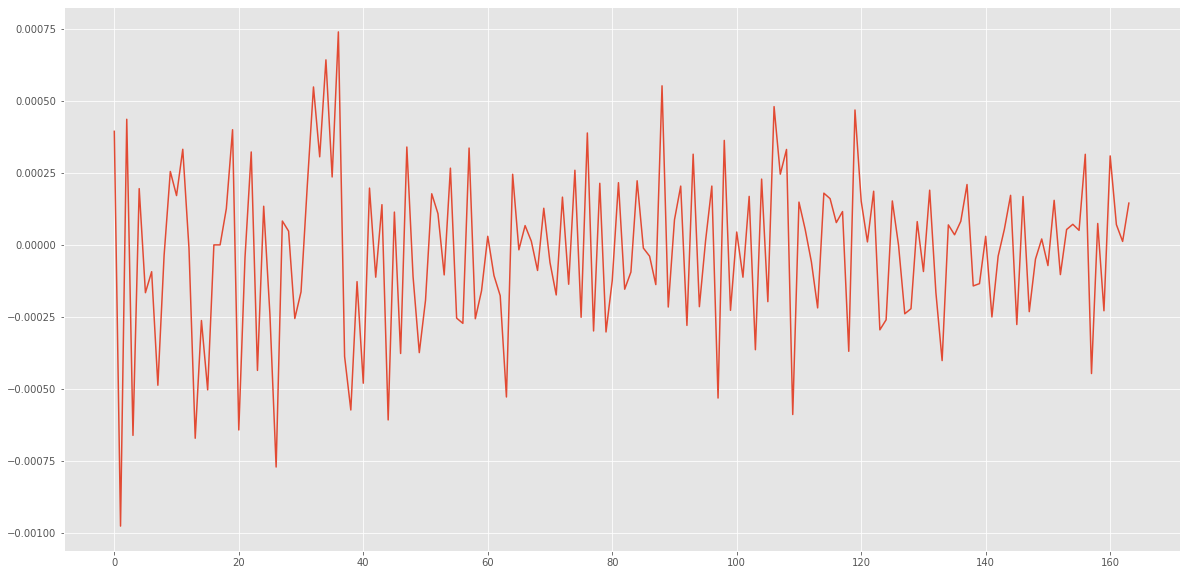

In [124]:
# Diffrencing

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)
ts_new_i = difference(ts_op_i)
ts_new_i.plot()


In [125]:
dic_full(ts_new_i)

(-16.176427673772896, 4.311233292452511e-29, 0, 163, {'1%': -3.471118535474365, '5%': -2.8794405060097024, '10%': -2.576313761526591}, -2030.0760589072938)
ADF = -16.176427673772896
p-value = 4.311233292452511e-29


In [126]:

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob


### For 'Export' 

In [136]:
ts_e= dfe['Export']

In [137]:
ts_op_e= (ts_e)**(-1/2)

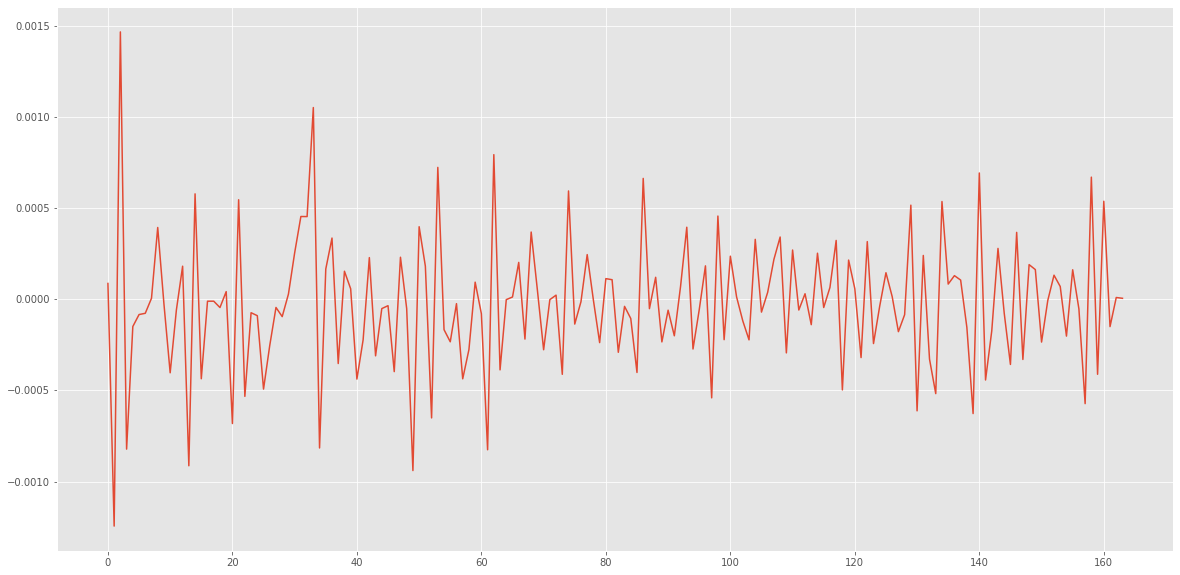

In [138]:
# Diffrencing
ts_new_e= difference(ts_op_e)
ts_new_e.plot()

In [139]:
dic_full(ts_new_e)

(-3.461692873648566, 0.0090271603009832, 11, 152, {'1%': -3.474120870218417, '5%': -2.880749791423677, '10%': -2.5770126333102494}, -2018.4683740471219)
ADF = -3.461692873648566
p-value = 0.0090271603009832


# Forecasting using Autoregression

### For Import 

In [127]:
type(dfi)

pandas.core.frame.DataFrame

Coefficients: [-1.59186684e-05 -4.31083238e-01  7.20968663e-03 -3.03108422e-02
  1.05856532e-01  1.04731594e-01  4.65999027e-02  1.28848486e-02
 -7.07693753e-03 -1.91488748e-02  2.07879214e-02 -8.23846318e-02
  5.05240494e-02 -5.46910857e-02 -9.35896668e-02  1.38177919e-01
 -8.28342788e-03 -5.25780207e-02  6.51348200e-02  4.58729128e-02
  1.33432345e-02 -9.94696036e-03 -9.58633720e-02  1.71957382e-02
  1.47826768e-01 -4.24108165e-02 -8.92349653e-03 -1.31243047e-01
 -1.84271881e-01  3.02964191e-02  4.76355103e-02  5.05824235e-02
  1.17368897e-04  2.82407748e-02  4.15258562e-02 -3.75639106e-02
  4.61881624e-02  5.63729311e-02 -9.98023910e-04 -3.90598056e-02
 -3.11929461e-03]
predicted=-0.000298, expected=-0.000445
predicted=0.000152, expected=0.000076
predicted=-0.000090, expected=-0.000227
predicted=0.000084, expected=0.000311
predicted=0.000069, expected=0.000072
predicted=-0.000104, expected=0.000014
predicted=-0.000007, expected=0.000147
Test RMSE: 0.000


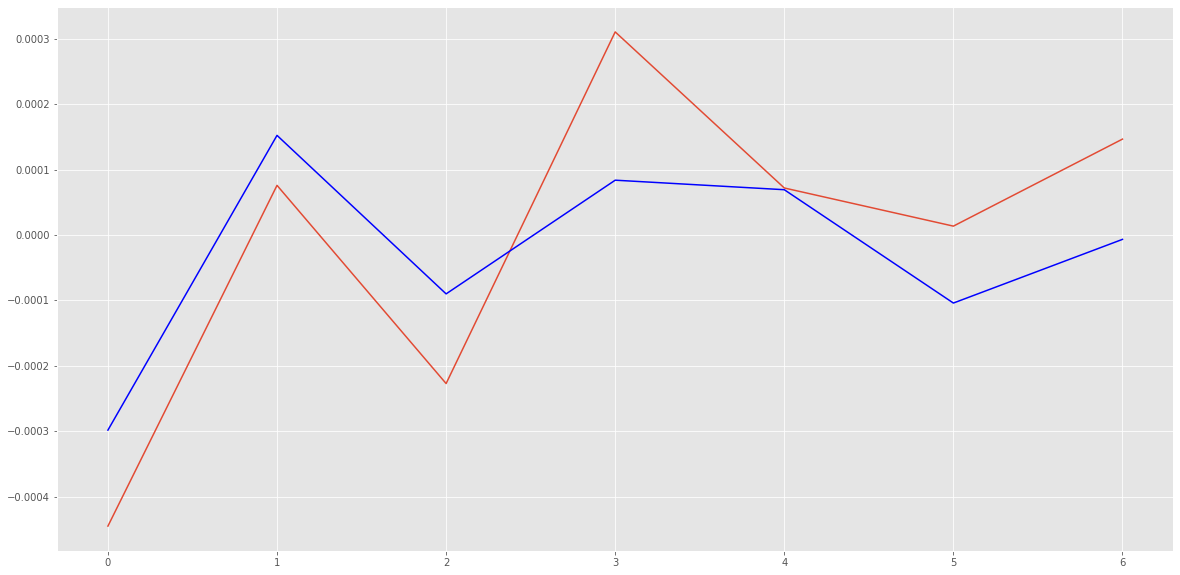

In [128]:
from statsmodels.tsa.ar_model import AutoReg

# split dataset
X = ts_new_i.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model_i = AutoReg(train, lags=40)
model_fit_i = model_i.fit()
print('Coefficients: %s' % model_fit_i.params)
# make predictions
predictions = model_fit_i.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='blue')
plt.show()

In [129]:
from sklearn.metrics import r2_score

r2 = r2_score(ts_new_i[len(ts_new_i)-7: ], predictions)
r2

0.6433592308557388

In [130]:
s= predictions.cumsum()
s

array([-2.98369251e-04, -1.45912629e-04, -2.35898478e-04, -1.51987035e-04,
       -8.26425212e-05, -1.86660419e-04, -1.93273704e-04])

In [131]:
q= s + ts_op_i[-8]
t= (q)**(-2)
t

array([41153.52787562, 38721.35273089, 40129.94685091, 38814.08669691,
       37774.89286467, 39349.85640772, 39453.30324735])

In [132]:
dfi['Import'].iloc[len(dfi)-7:]

Date
2019-03-01    43718.65
2019-04-01    42361.61
2019-05-01    46618.80
2019-06-01    40941.24
2019-07-01    39773.89
2019-08-01    39558.33
2019-09-01    37346.35
Name: Import, dtype: float64

In [133]:
# Total Error in Prediction
co=[]
for i in range(0, 6):
    y= np.abs(t[i] - dfi['Import'][len(dfi)-7 +i])
    co.append(y)
np.average(co)

2838.1427622142924

In [134]:
from sklearn.metrics import mean_squared_error  
  
# Calculation of Root Mean Squared Error (RMSE) 
np.sqrt(mean_squared_error(dfi['Import'].iloc[len(dfi)-7:], t)) 

3271.959300214896

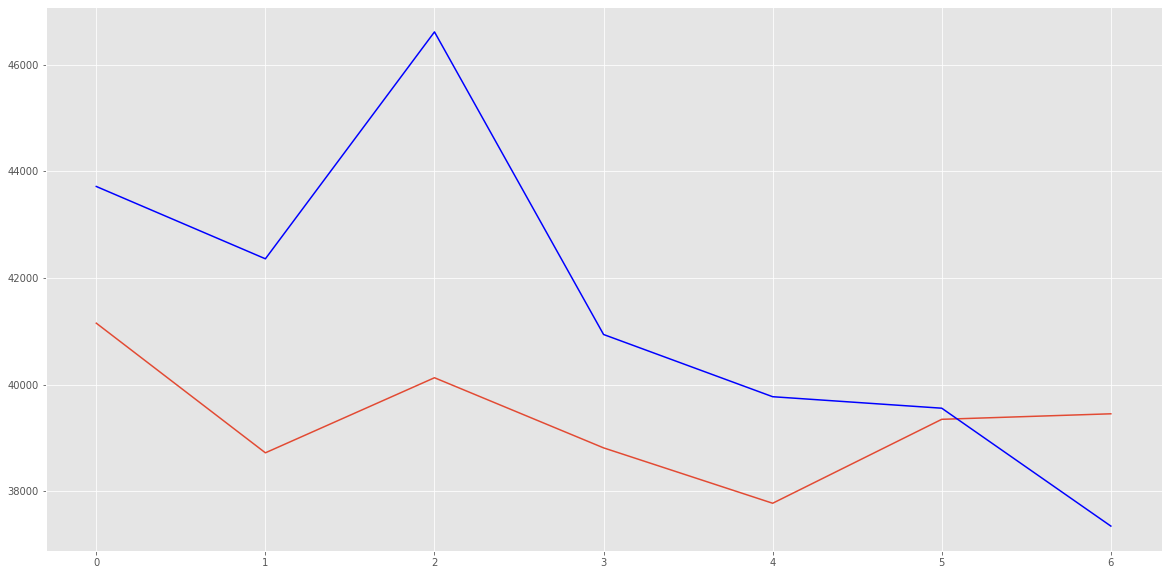

In [135]:
plt.plot(t)
plt.plot(pd.Series(dfi['Import'][len(dfe)-7: ].tolist()), color='blue')
plt.show()

### For Export 

Coefficients: [-1.25194742e-05 -4.76797355e-01 -1.76579047e-02 -9.55857587e-02
 -1.11112435e-01  5.10618497e-02  2.62906466e-01  1.25123385e-01
  1.14878728e-01  1.99008130e-01 -7.06248092e-02 -4.34424197e-02
  1.50095615e-01 -1.28892592e-01 -4.19584981e-02  1.12732295e-01
 -6.13839304e-02 -2.37132071e-01  2.10912984e-02  8.59962094e-02
 -7.87945255e-02 -4.24950833e-03  1.33068669e-01  7.72169811e-02
  5.63059529e-02 -1.06967655e-01 -5.67702750e-02 -1.04871667e-01
 -1.25361499e-01 -2.23079706e-02 -8.22479108e-02  1.23943028e-01
  1.11452531e-01 -3.10880844e-02  1.33104620e-01  4.71954985e-02
  1.56123700e-01  5.81200478e-02 -7.09463605e-02  8.99413537e-02
 -1.99889681e-03 -4.67424069e-02]
predicted=-0.000234, expected=-0.000572
predicted=0.000541, expected=0.000670
predicted=-0.000293, expected=-0.000411
predicted=0.000077, expected=0.000538
predicted=0.000022, expected=-0.000150
predicted=-0.000170, expected=0.000010
predicted=-0.000046, expected=0.000006
Test RMSE: 0.000


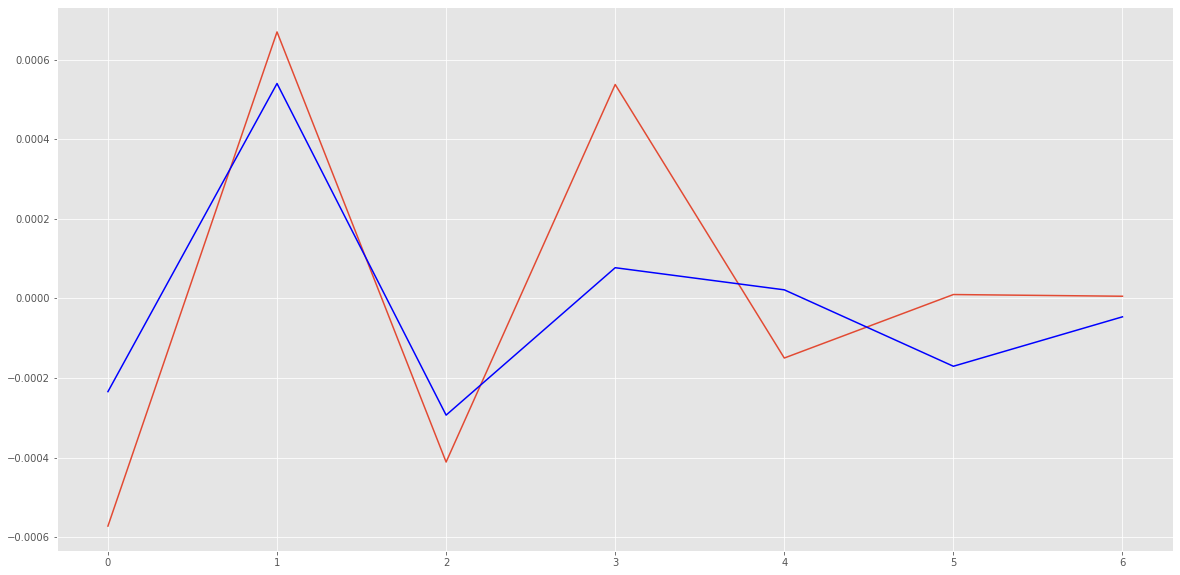

In [140]:
from statsmodels.tsa.ar_model import AutoReg

# split dataset
X = ts_new_e.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=41)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='blue')
plt.show()

In [141]:
from sklearn.metrics import r2_score

r2 = r2_score(ts_new_e[len(ts_new_e)-7: ], predictions)
r2

0.6643547531749086

In [142]:
predictions

array([-2.34326001e-04,  5.40656776e-04, -2.93360005e-04,  7.73720881e-05,
        2.17454881e-05, -1.70457938e-04, -4.61368418e-05])

In [143]:
s= predictions.cumsum()
s

array([-2.34326001e-04,  3.06330775e-04,  1.29707706e-05,  9.03428586e-05,
        1.12088347e-04, -5.83695910e-05, -1.04506433e-04])

In [144]:
q= s + ts_op_e[-8]
t= (q)**(-2)
t

array([29054.67161446, 24358.22306511, 26751.81001215, 26087.36290979,
       25905.07364974, 27387.21193625, 27810.26590204])

In [145]:
# Total error in prediction
co=[]
for i in range(0, 6):
    y= np.abs(t[i] - dfe['Export'][len(dfe)-7 +i])
    co.append(y)
np.average(co)

1848.79108409596

In [146]:
from sklearn.metrics import mean_squared_error  
  
# Calculation of Root Mean Squared Error (RMSE) 
np.sqrt(mean_squared_error(dfe['Export'].iloc[len(dfe)-7:], t)) 

2126.598353474857

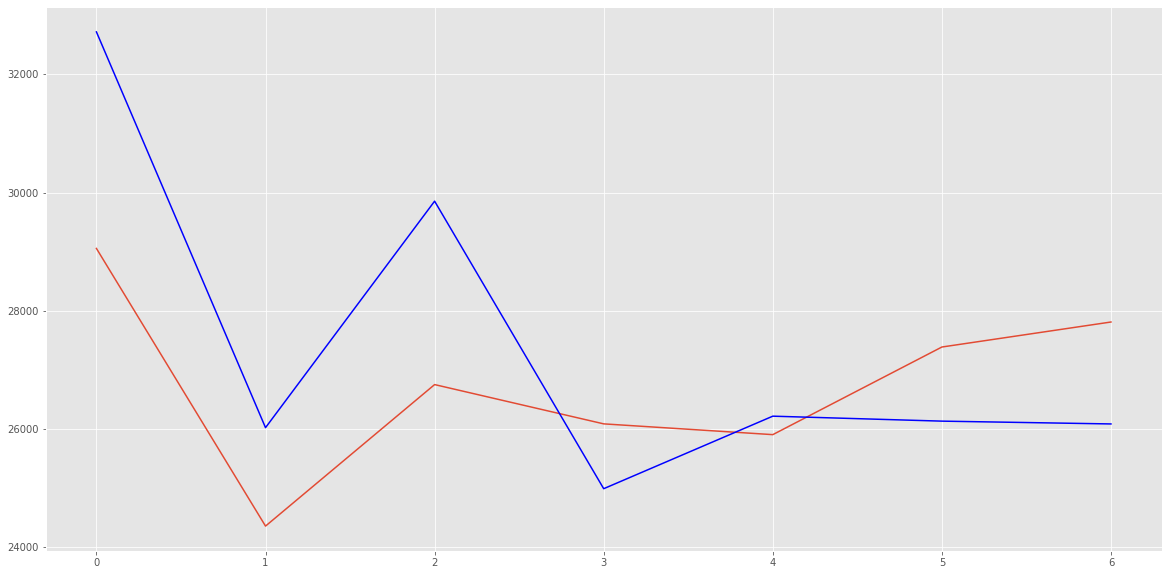

In [147]:
plt.plot(t)
plt.plot(pd.Series(dfe['Export'][len(dfe)-7: ].tolist()), color='blue')
plt.show()